In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5177279


In [5]:
!mkdir $LOCAL/sandbox

In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5177279/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [10]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [12]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [10]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [13]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [14]:
traintest.num_dataset()

5

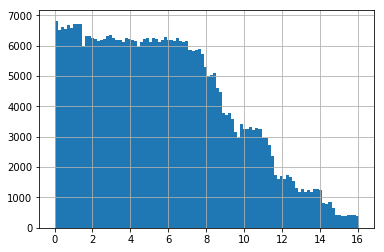

In [15]:
traintest.ydf.hist(bins=100);

In [16]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [17]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [57]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [58]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [59]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [60]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [61]:
qdf=qdf[~qdf['index'].isin({0,16})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((410717, 1), (410717, 100), (410717,))

In [62]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{1: 29606, 2: 36381, 3: 22721, 4: 32572, 5: 20661, 6: 18112, 7: 41320, 8: 20285, 9: 24722, 10: 29316, 11: 28282, 12: 22648, 13: 21974, 14: 37848, 15: 24269}'

In [63]:
quakes=set(qdf['index'])
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [64]:
import utils
n_thread= utils.get_num_thread()
n_thread

3

In [65]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [66]:
testX=testdf.values
testX.shape

(2624, 100)

In [67]:
trainX=datadf.values
trainX.shape, qdf.shape

((410717, 100), (410717, 1))

In [68]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,1000,trainX)
    topidxs += a

CPU times: user 15min 47s, sys: 4min 14s, total: 20min 2s
Wall time: 6min 41s


In [73]:
len(topidxs),len(set(topidxs))

(2624000, 282247)

In [70]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

1     138665
2      36866
3      36325
4      90424
5      96136
6     132588
7     474646
8      69490
9      87958
10    165927
11     67666
12     35902
13     58991
14    608461
15    523955
Name: index, dtype: int64

In [72]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

1     21234
2     14151
3     11856
4     18557
5     16385
6     12689
7     36971
8     14249
9     16234
10    24026
11    17208
12    11359
13    13726
14    31855
15    21747
Name: index, dtype: int64

In [75]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((282247, 1), (282247, 100), (282247,))

In [76]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [77]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [78]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  1 1 (nan, nan)
valid quake 2 train quake 1
(21234, 100) (21234,) (14151, 100) (14151,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.05739	valid_1's l1: 3.13721
[100]	training's l1: 0.701424	valid_1's l1: 3.00433
[150]	training's l1: 0.535383	valid_1's l1: 2.93857
[200]	training's l1: 0.449553	valid_1's l1: 2.90736
[250]	training's l1: 0.401623	valid_1's l1: 2.88978
[300]	training's l1: 0.369174	valid_1's l1: 2.88273
[350]	training's l1: 0.345384	valid_1's l1: 2.88369
[400]	training's l1: 0.32663	valid_1's l1: 2.88345
[450]	training's l1: 0.311095	valid_1's l1: 2.882
[500]	training's l1: 0.298633	valid_1's l1: 2.88227
[550]	training's l1: 0.287651	valid_1's l1: 2.88386
[600]	training's l1: 0.277997	valid_1's l1: 2.88626
[650]	training's l1: 0.2694	valid_1's l1: 2.88591
Early stopping, best iteration is:
[459]	training's l1: 0.308684	valid_1's l1: 2.88107
quake  1 2 (2.8810747041268447, 459)
valid quake 3 train quake 1
(21234, 100) (21234,) 

[100]	training's l1: 0.701424	valid_1's l1: 2.13995
[150]	training's l1: 0.535383	valid_1's l1: 2.13515
[200]	training's l1: 0.449553	valid_1's l1: 2.13111
[250]	training's l1: 0.401623	valid_1's l1: 2.13195
[300]	training's l1: 0.369174	valid_1's l1: 2.12491
[350]	training's l1: 0.345384	valid_1's l1: 2.11812
[400]	training's l1: 0.32663	valid_1's l1: 2.11179
[450]	training's l1: 0.311095	valid_1's l1: 2.10516
[500]	training's l1: 0.298633	valid_1's l1: 2.10103
[550]	training's l1: 0.287651	valid_1's l1: 2.09685
[600]	training's l1: 0.277997	valid_1's l1: 2.09206
[650]	training's l1: 0.2694	valid_1's l1: 2.08774
[700]	training's l1: 0.261324	valid_1's l1: 2.08272
[750]	training's l1: 0.254434	valid_1's l1: 2.07657
[800]	training's l1: 0.248027	valid_1's l1: 2.07214
[850]	training's l1: 0.241501	valid_1's l1: 2.06778
[900]	training's l1: 0.235522	valid_1's l1: 2.06452
[950]	training's l1: 0.230034	valid_1's l1: 2.06067
[1000]	training's l1: 0.224968	valid_1's l1: 2.05661
[1050]	trainin

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.16503	valid_1's l1: 6.02085
[100]	training's l1: 0.734214	valid_1's l1: 6.01645
[150]	training's l1: 0.549505	valid_1's l1: 6.04143
[200]	training's l1: 0.457384	valid_1's l1: 6.05988
Early stopping, best iteration is:
[1]	training's l1: 3.47988	valid_1's l1: 5.62426
quake  2 6 (5.624262569651241, 1)
valid quake 7 train quake 2
(14151, 100) (14151,) (36971, 100) (36971,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.16503	valid_1's l1: 2.50799
[100]	training's l1: 0.734214	valid_1's l1: 2.35436
[150]	training's l1: 0.549505	valid_1's l1: 2.30087
[200]	training's l1: 0.457384	valid_1's l1: 2.27502
[250]	training's l1: 0.405676	valid_1's l1: 2.25999
[300]	training's l1: 0.372705	valid_1's l1: 2.24895
[350]	training's l1: 0.348137	valid_1's l1: 2.24309
[400]	training's l1: 0.328443	valid_1's l1: 2.23895
[450]	training's l1: 0.31114	valid_1's l1: 2.23712
[500]	trainin

[200]	training's l1: 0.457384	valid_1's l1: 2.07831
[250]	training's l1: 0.405676	valid_1's l1: 2.0594
[300]	training's l1: 0.372705	valid_1's l1: 2.04161
[350]	training's l1: 0.348137	valid_1's l1: 2.03487
[400]	training's l1: 0.328443	valid_1's l1: 2.02733
[450]	training's l1: 0.31114	valid_1's l1: 2.019
[500]	training's l1: 0.296282	valid_1's l1: 2.01436
[550]	training's l1: 0.283112	valid_1's l1: 2.01181
[600]	training's l1: 0.271794	valid_1's l1: 2.01098
[650]	training's l1: 0.261001	valid_1's l1: 2.00715
[700]	training's l1: 0.251281	valid_1's l1: 2.00607
[750]	training's l1: 0.242848	valid_1's l1: 2.00445
[800]	training's l1: 0.235258	valid_1's l1: 2.00441
[850]	training's l1: 0.227693	valid_1's l1: 2.00276
[900]	training's l1: 0.220839	valid_1's l1: 2.00232
[950]	training's l1: 0.214527	valid_1's l1: 2.00247
[1000]	training's l1: 0.20894	valid_1's l1: 2.0019
[1050]	training's l1: 0.20345	valid_1's l1: 2.00155
[1100]	training's l1: 0.198184	valid_1's l1: 2.00148
[1150]	training'

[600]	training's l1: 0.134863	valid_1's l1: 2.16634
[650]	training's l1: 0.130114	valid_1's l1: 2.16694
[700]	training's l1: 0.125853	valid_1's l1: 2.16624
Early stopping, best iteration is:
[525]	training's l1: 0.142782	valid_1's l1: 2.16538
quake  3 10 (2.165383523742611, 525)
valid quake 11 train quake 3
(11856, 100) (11856,) (17208, 100) (17208,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.832137	valid_1's l1: 1.88103
[100]	training's l1: 0.517418	valid_1's l1: 1.85542
[150]	training's l1: 0.357914	valid_1's l1: 1.85161
[200]	training's l1: 0.268292	valid_1's l1: 1.85414
[250]	training's l1: 0.220747	valid_1's l1: 1.85796
[300]	training's l1: 0.191278	valid_1's l1: 1.85963
Early stopping, best iteration is:
[139]	training's l1: 0.385602	valid_1's l1: 1.84969
quake  3 11 (1.8496851771467424, 139)
valid quake 12 train quake 3
(11856, 100) (11856,) (11359, 100) (11359,)
Training until validation scores don't improve for 200 rounds.
[50]	trainin

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07752	valid_1's l1: 1.70911
[100]	training's l1: 0.738983	valid_1's l1: 1.68699
[150]	training's l1: 0.584293	valid_1's l1: 1.68916
[200]	training's l1: 0.500342	valid_1's l1: 1.70492
[250]	training's l1: 0.448221	valid_1's l1: 1.71572
[300]	training's l1: 0.41084	valid_1's l1: 1.7244
Early stopping, best iteration is:
[125]	training's l1: 0.648266	valid_1's l1: 1.68236
quake  4 10 (1.6823646290512955, 125)
valid quake 11 train quake 4
(18557, 100) (18557,) (17208, 100) (17208,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07752	valid_1's l1: 1.34716
[100]	training's l1: 0.738983	valid_1's l1: 1.35087
[150]	training's l1: 0.584293	valid_1's l1: 1.37531
[200]	training's l1: 0.500342	valid_1's l1: 1.39663
[250]	training's l1: 0.448221	valid_1's l1: 1.41024
Early stopping, best iteration is:
[80]	training's l1: 0.84133	valid_1's l1: 1.34058
quake  4 11 (1.3405829044

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.753113	valid_1's l1: 2.25152
[100]	training's l1: 0.495507	valid_1's l1: 2.30119
[150]	training's l1: 0.357506	valid_1's l1: 2.33742
[200]	training's l1: 0.280884	valid_1's l1: 2.37047
Early stopping, best iteration is:
[34]	training's l1: 0.900601	valid_1's l1: 2.23741
quake  5 11 (2.2374131139840494, 34)
valid quake 12 train quake 5
(16385, 100) (16385,) (11359, 100) (11359,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.753113	valid_1's l1: 1.0211
[100]	training's l1: 0.495507	valid_1's l1: 0.952147
[150]	training's l1: 0.357506	valid_1's l1: 0.950586
[200]	training's l1: 0.280884	valid_1's l1: 0.966073
[250]	training's l1: 0.238714	valid_1's l1: 0.97924
[300]	training's l1: 0.213763	valid_1's l1: 0.986164
Early stopping, best iteration is:
[120]	training's l1: 0.431513	valid_1's l1: 0.947054
quake  5 12 (0.9470536271973966, 120)
valid quake 13 train quake 5
(1

Early stopping, best iteration is:
[345]	training's l1: 0.161888	valid_1's l1: 0.931661
quake  6 5 (0.9316613986888322, 345)
quake  6 6 (nan, nan)
valid quake 7 train quake 6
(12689, 100) (12689,) (36971, 100) (36971,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.679916	valid_1's l1: 5.57438
[100]	training's l1: 0.448971	valid_1's l1: 5.5985
[150]	training's l1: 0.321932	valid_1's l1: 5.62222
[200]	training's l1: 0.24791	valid_1's l1: 5.63817
Early stopping, best iteration is:
[22]	training's l1: 0.953034	valid_1's l1: 5.53014
quake  6 7 (5.5301395359480745, 22)
valid quake 8 train quake 6
(12689, 100) (12689,) (14249, 100) (14249,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.679916	valid_1's l1: 1.04882
[100]	training's l1: 0.448971	valid_1's l1: 0.925445
[150]	training's l1: 0.321932	valid_1's l1: 0.866629
[200]	training's l1: 0.24791	valid_1's l1: 0.837715
[250]	training's l1: 0.204057	valid_1's l1: 0.8

[50]	training's l1: 1.60338	valid_1's l1: 3.30639
[100]	training's l1: 1.18378	valid_1's l1: 3.29727
[150]	training's l1: 1.0004	valid_1's l1: 3.30938
[200]	training's l1: 0.896185	valid_1's l1: 3.3134
Early stopping, best iteration is:
[8]	training's l1: 3.12248	valid_1's l1: 3.25082
quake  7 1 (3.2508201131806103, 8)
valid quake 2 train quake 7
(36971, 100) (36971,) (14151, 100) (14151,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.60338	valid_1's l1: 2.0845
[100]	training's l1: 1.18378	valid_1's l1: 2.02085
[150]	training's l1: 1.0004	valid_1's l1: 2.05341
[200]	training's l1: 0.896185	valid_1's l1: 2.05099
[250]	training's l1: 0.82425	valid_1's l1: 2.06856
[300]	training's l1: 0.770921	valid_1's l1: 2.08282
Early stopping, best iteration is:
[120]	training's l1: 1.09392	valid_1's l1: 2.01197
quake  7 2 (2.0119675859294794, 120)
valid quake 3 train quake 7
(36971, 100) (36971,) (11856, 100) (11856,)
Training until validation scores don't impro

Early stopping, best iteration is:
[41]	training's l1: 0.800648	valid_1's l1: 2.74844
quake  8 1 (2.748441494501237, 41)
valid quake 2 train quake 8
(14249, 100) (14249,) (14151, 100) (14151,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.727714	valid_1's l1: 4.91
[100]	training's l1: 0.478018	valid_1's l1: 4.9307
[150]	training's l1: 0.339499	valid_1's l1: 4.95058
[200]	training's l1: 0.261219	valid_1's l1: 4.96408
Early stopping, best iteration is:
[49]	training's l1: 0.735099	valid_1's l1: 4.90968
quake  8 2 (4.909681008008405, 49)
valid quake 3 train quake 8
(14249, 100) (14249,) (11856, 100) (11856,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.727714	valid_1's l1: 1.36096
[100]	training's l1: 0.478018	valid_1's l1: 1.27444
[150]	training's l1: 0.339499	valid_1's l1: 1.23645
[200]	training's l1: 0.261219	valid_1's l1: 1.2181
[250]	training's l1: 0.215955	valid_1's l1: 1.20751
[300]	training's l1: 0.1904

Early stopping, best iteration is:
[835]	training's l1: 0.121189	valid_1's l1: 1.88502
quake  8 15 (1.8850179273903134, 835)
valid quake 1 train quake 9
(16234, 100) (16234,) (21234, 100) (21234,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.84992	valid_1's l1: 2.11554
[100]	training's l1: 0.541986	valid_1's l1: 1.99705
[150]	training's l1: 0.391576	valid_1's l1: 1.93437
[200]	training's l1: 0.313987	valid_1's l1: 1.90362
[250]	training's l1: 0.274047	valid_1's l1: 1.88245
[300]	training's l1: 0.248356	valid_1's l1: 1.87225
[350]	training's l1: 0.231344	valid_1's l1: 1.86362
[400]	training's l1: 0.217483	valid_1's l1: 1.85841
[450]	training's l1: 0.205261	valid_1's l1: 1.85689
[500]	training's l1: 0.195474	valid_1's l1: 1.8541
[550]	training's l1: 0.186997	valid_1's l1: 1.85169
[600]	training's l1: 0.17961	valid_1's l1: 1.85107
[650]	training's l1: 0.172956	valid_1's l1: 1.84689
[700]	training's l1: 0.167403	valid_1's l1: 1.84679
[750]	training's

[50]	training's l1: 0.84992	valid_1's l1: 1.00834
[100]	training's l1: 0.541986	valid_1's l1: 0.923694
[150]	training's l1: 0.391576	valid_1's l1: 0.905734
[200]	training's l1: 0.313987	valid_1's l1: 0.904557
[250]	training's l1: 0.274047	valid_1's l1: 0.907885
[300]	training's l1: 0.248356	valid_1's l1: 0.91292
[350]	training's l1: 0.231344	valid_1's l1: 0.91701
Early stopping, best iteration is:
[177]	training's l1: 0.343256	valid_1's l1: 0.903467
quake  9 12 (0.9034667970210474, 177)
valid quake 13 train quake 9
(16234, 100) (16234,) (13726, 100) (13726,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.84992	valid_1's l1: 1.18067
[100]	training's l1: 0.541986	valid_1's l1: 1.13235
[150]	training's l1: 0.391576	valid_1's l1: 1.13151
[200]	training's l1: 0.313987	valid_1's l1: 1.13405
[250]	training's l1: 0.274047	valid_1's l1: 1.13778
[300]	training's l1: 0.248356	valid_1's l1: 1.13728
Early stopping, best iteration is:
[146]	training's l1: 0.4002

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.04554	valid_1's l1: 3.38105
[100]	training's l1: 0.703315	valid_1's l1: 3.29162
[150]	training's l1: 0.549312	valid_1's l1: 3.26081
[200]	training's l1: 0.473558	valid_1's l1: 3.24517
[250]	training's l1: 0.431229	valid_1's l1: 3.24187
[300]	training's l1: 0.401571	valid_1's l1: 3.23935
[350]	training's l1: 0.37732	valid_1's l1: 3.23879
[400]	training's l1: 0.355589	valid_1's l1: 3.24052
[450]	training's l1: 0.337697	valid_1's l1: 3.24183
[500]	training's l1: 0.322049	valid_1's l1: 3.24333
Early stopping, best iteration is:
[334]	training's l1: 0.384333	valid_1's l1: 3.23815
quake  10 7 (3.2381519434857133, 334)
valid quake 8 train quake 10
(24026, 100) (24026,) (14249, 100) (14249,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.04554	valid_1's l1: 3.00643
[100]	training's l1: 0.703315	valid_1's l1: 3.06621
[150]	training's l1: 0.549312	valid_1's l1: 3.11009
[200]

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.890658	valid_1's l1: 1.84334
[100]	training's l1: 0.580207	valid_1's l1: 1.81039
[150]	training's l1: 0.426428	valid_1's l1: 1.81404
[200]	training's l1: 0.345638	valid_1's l1: 1.82649
Early stopping, best iteration is:
[14]	training's l1: 1.55965	valid_1's l1: 1.7932
quake  11 3 (1.793201388654543, 14)
valid quake 4 train quake 11
(17208, 100) (17208,) (18557, 100) (18557,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.890658	valid_1's l1: 1.68674
[100]	training's l1: 0.580207	valid_1's l1: 1.64091
[150]	training's l1: 0.426428	valid_1's l1: 1.6274
[200]	training's l1: 0.345638	valid_1's l1: 1.62141
[250]	training's l1: 0.300701	valid_1's l1: 1.6159
[300]	training's l1: 0.272755	valid_1's l1: 1.61279
[350]	training's l1: 0.252682	valid_1's l1: 1.60984
[400]	training's l1: 0.237607	valid_1's l1: 1.60789
[450]	training's l1: 0.225146	valid_1's l1: 1.60561
[500]	tra

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.890658	valid_1's l1: 3.23397
[100]	training's l1: 0.580207	valid_1's l1: 3.30706
[150]	training's l1: 0.426428	valid_1's l1: 3.33092
[200]	training's l1: 0.345638	valid_1's l1: 3.34405
Early stopping, best iteration is:
[20]	training's l1: 1.30135	valid_1's l1: 3.09525
quake  11 14 (3.095247639315635, 20)
valid quake 15 train quake 11
(17208, 100) (17208,) (21747, 100) (21747,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.890658	valid_1's l1: 1.47585
[100]	training's l1: 0.580207	valid_1's l1: 1.57067
[150]	training's l1: 0.426428	valid_1's l1: 1.62583
[200]	training's l1: 0.345638	valid_1's l1: 1.66655
Early stopping, best iteration is:
[17]	training's l1: 1.41393	valid_1's l1: 1.36206
quake  11 15 (1.3620612741200206, 17)
valid quake 1 train quake 12
(11359, 100) (11359,) (21234, 100) (21234,)
Training until validation scores don't improve for 200 rounds.
[50]	

[450]	training's l1: 0.139931	valid_1's l1: 2.00036
[500]	training's l1: 0.133116	valid_1's l1: 1.99934
[550]	training's l1: 0.127274	valid_1's l1: 1.99968
[600]	training's l1: 0.122373	valid_1's l1: 2.00038
[650]	training's l1: 0.117902	valid_1's l1: 2.00119
[700]	training's l1: 0.113812	valid_1's l1: 2.00157
Early stopping, best iteration is:
[506]	training's l1: 0.132341	valid_1's l1: 1.99909
quake  12 10 (1.9990903248365424, 506)
valid quake 11 train quake 12
(11359, 100) (11359,) (17208, 100) (17208,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.691193	valid_1's l1: 1.88102
[100]	training's l1: 0.441632	valid_1's l1: 1.81081
[150]	training's l1: 0.310868	valid_1's l1: 1.78062
[200]	training's l1: 0.238897	valid_1's l1: 1.76412
[250]	training's l1: 0.197845	valid_1's l1: 1.75857
[300]	training's l1: 0.173619	valid_1's l1: 1.75515
[350]	training's l1: 0.158624	valid_1's l1: 1.7553
[400]	training's l1: 0.147983	valid_1's l1: 1.75539
[450]	train

[250]	training's l1: 0.272063	valid_1's l1: 1.27292
[300]	training's l1: 0.244933	valid_1's l1: 1.2641
[350]	training's l1: 0.227429	valid_1's l1: 1.2581
[400]	training's l1: 0.214068	valid_1's l1: 1.25732
[450]	training's l1: 0.203295	valid_1's l1: 1.26086
[500]	training's l1: 0.194404	valid_1's l1: 1.26079
[550]	training's l1: 0.18688	valid_1's l1: 1.26072
Early stopping, best iteration is:
[385]	training's l1: 0.217768	valid_1's l1: 1.25629
quake  13 6 (1.2562902399800189, 385)
valid quake 7 train quake 13
(13726, 100) (13726,) (36971, 100) (36971,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.794988	valid_1's l1: 4.8672
[100]	training's l1: 0.532289	valid_1's l1: 4.90348
[150]	training's l1: 0.393382	valid_1's l1: 4.93555
[200]	training's l1: 0.316994	valid_1's l1: 4.94867
Early stopping, best iteration is:
[26]	training's l1: 1.03741	valid_1's l1: 4.85854
quake  13 7 (4.858542439184622, 26)
valid quake 8 train quake 13
(13726, 100) (13726,) 

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.40049	valid_1's l1: 2.43217
[100]	training's l1: 1.02744	valid_1's l1: 2.39398
[150]	training's l1: 0.845071	valid_1's l1: 2.39115
[200]	training's l1: 0.746335	valid_1's l1: 2.38406
[250]	training's l1: 0.684182	valid_1's l1: 2.37084
[300]	training's l1: 0.635785	valid_1's l1: 2.36001
[350]	training's l1: 0.598139	valid_1's l1: 2.35514
[400]	training's l1: 0.565692	valid_1's l1: 2.35281
[450]	training's l1: 0.537721	valid_1's l1: 2.35059
[500]	training's l1: 0.513058	valid_1's l1: 2.35009
[550]	training's l1: 0.491986	valid_1's l1: 2.34758
[600]	training's l1: 0.473402	valid_1's l1: 2.34472
[650]	training's l1: 0.457057	valid_1's l1: 2.34221
[700]	training's l1: 0.442236	valid_1's l1: 2.33981
[750]	training's l1: 0.428776	valid_1's l1: 2.33872
[800]	training's l1: 0.416662	valid_1's l1: 2.33754
[850]	training's l1: 0.40473	valid_1's l1: 2.33601
[900]	training's l1: 0.394668	valid_1's l1: 2.33397
[950]

[100]	training's l1: 0.517798	valid_1's l1: 5.42965
[150]	training's l1: 0.365835	valid_1's l1: 5.4918
[200]	training's l1: 0.285944	valid_1's l1: 5.50632
Early stopping, best iteration is:
[15]	training's l1: 1.29578	valid_1's l1: 4.81349
quake  15 2 (4.813485972487183, 15)
valid quake 3 train quake 15
(21747, 100) (21747,) (11856, 100) (11856,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.813856	valid_1's l1: 1.7258
[100]	training's l1: 0.517798	valid_1's l1: 1.7509
[150]	training's l1: 0.365835	valid_1's l1: 1.75029
[200]	training's l1: 0.285944	valid_1's l1: 1.7355
[250]	training's l1: 0.243542	valid_1's l1: 1.71145
Early stopping, best iteration is:
[65]	training's l1: 0.700754	valid_1's l1: 1.70312
quake  15 3 (1.7031186183335116, 65)
valid quake 4 train quake 15
(21747, 100) (21747,) (18557, 100) (18557,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.813856	valid_1's l1: 2.6248
[100]	training's l1: 0.

[50]	training's l1: 0.813856	valid_1's l1: 1.59269
[100]	training's l1: 0.517798	valid_1's l1: 1.64217
[150]	training's l1: 0.365835	valid_1's l1: 1.62479
[200]	training's l1: 0.285944	valid_1's l1: 1.59907
[250]	training's l1: 0.243542	valid_1's l1: 1.57719
[300]	training's l1: 0.22006	valid_1's l1: 1.5749
[350]	training's l1: 0.204986	valid_1's l1: 1.57178
[400]	training's l1: 0.193371	valid_1's l1: 1.57233
[450]	training's l1: 0.183954	valid_1's l1: 1.57242
[500]	training's l1: 0.175741	valid_1's l1: 1.5693
[550]	training's l1: 0.168834	valid_1's l1: 1.57281
[600]	training's l1: 0.162683	valid_1's l1: 1.57747
Early stopping, best iteration is:
[440]	training's l1: 0.185687	valid_1's l1: 1.56712
quake  15 13 (1.5671229328134242, 440)
valid quake 14 train quake 15
(21747, 100) (21747,) (31855, 100) (31855,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.813856	valid_1's l1: 3.61018
[100]	training's l1: 0.517798	valid_1's l1: 3.711
[150]	training's

In [80]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [81]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [82]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [83]:
pvdf.style.apply(highlight_max,axis=1)

In [84]:
pvdf.style.apply(highlight_min,axis=1)

In [85]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))